In [3]:
'''
jaccard距离：衡量有限样本集之间额相似度
    - d=1-A.intersection(B)/A.union(B)
    - 可用于网页去重和文本相似度分析
'''
a = {8, 9, 17, 25, 4}
b = {9, 10, 17, 24, 4, 8}
c = {8, 9, 25}


#计算样本集合之间的jaccard距离
def jaccard(a, b):
    if not a and not b:
        #若a,b集合都为空则jaccard距离为0
        return 0
    return 1 - len(a.intersection(b)) / len(a.union(b))


d_ab = jaccard(a, b)
d_bc = jaccard(b, c)
d_ac = jaccard(a, c)

print(d_ab, d_bc, d_ac)

0.4285714285714286 0.7142857142857143 0.4


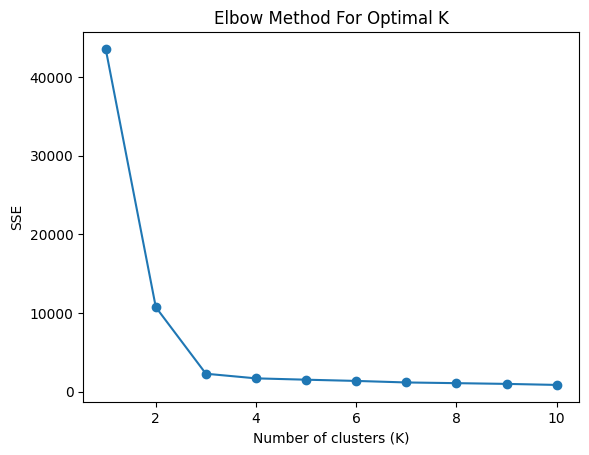

In [5]:
'''
k-means算法中K的选择：
肘部法则：肘部法则是一种常见的选择 K 值的方法，它基于聚类的误差平方和（Sum of Squared Errors，SSE）来判断最佳的 K 值
    多次计算k-means算法的代价值与K的关系，找到SSE下降由快变慢的拐点处的K值,该K值收益最大
'''
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=59)
sse = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=59)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(K_range, sse, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('SSE')
plt.show()


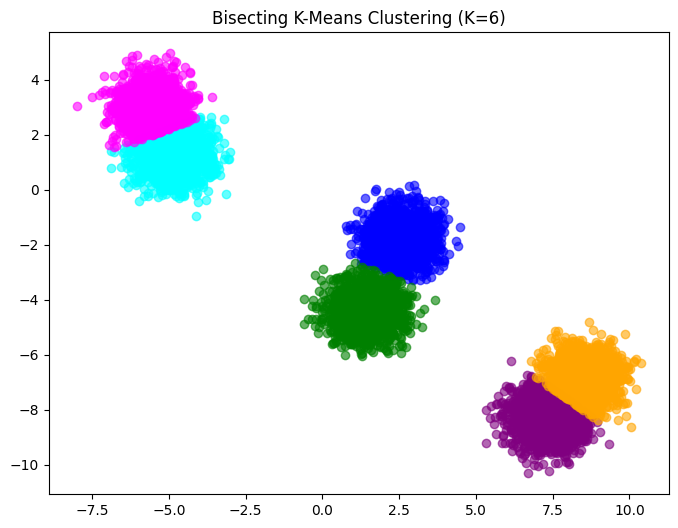

In [5]:
'''
实现2分k-means算法
'''
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 生成数据集
X, _ = make_blobs(n_samples=10000, centers=6, cluster_std=0.60, random_state=59)
'''
返回聚簇列表中误差平方和最大的聚簇索引
'''
def getMaxCluster(clusters):
    maxSse = np.sum((clusters[0] - np.mean(clusters[0], axis=0)) ** 2)
    maxIndex = 0
    for index, item in enumerate(clusters):
        if index == 0:
            continue
        #计算当前簇的误差平方和
        curSse = np.sum((item - np.mean(item, axis=0)) ** 2)
        if curSse > maxSse:
            maxSse = curSse
            maxIndex = index
    return maxIndex

# 定义二分 K-means 聚类
def bisecting_kmeans(X, k):
    clusters = [X]  # 初始化簇列表
    while len(clusters) < k:
        # 找到误差平方和（SSE）最大的簇
        clusterIndex=getMaxCluster(clusters)
        max_sse_cluster = clusters[clusterIndex]
        del clusters[clusterIndex]

        # 对该簇进行 K-means 聚类，K=2（二分）
        kmeans = KMeans(n_clusters=2, random_state=59)
        labels = kmeans.fit_predict(max_sse_cluster)

        # 将二分后的簇加入簇列表
        clusters.append(max_sse_cluster[labels == 0])
        clusters.append(max_sse_cluster[labels == 1])

    return clusters


# 使用二分 K-means 聚类
k = 6
clusters = bisecting_kmeans(X, k)

# 可视化聚类结果
colors = ['blue', 'green', 'purple', 'orange', 'cyan', 'magenta']
plt.figure(figsize=(8, 6))

for i, cluster in enumerate(clusters):
    plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i % len(colors)], alpha=0.6)

plt.title(f'Bisecting K-Means Clustering (K={k})')
plt.show()



In [1]:
'''

'''


'\n\n'